# To Do:
    - What is average score of Mumbai Indians? while batting first
    - How many matches are played on weekends? plot 
    - What are the different venues on which RCB Played?
    - What is the Highest Score? by which team?
    - What is the Lowest Score? by which team?
    - How many matches KKR won if they played on their home ground?
    - How many matches DC won while playing away from their home?
    - On which venue most of the matches played?
    - How many matches KXIP won while playing on weekends?
    - What is the lowest total of CSK?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Load preprocessed dataset

df = pd.read_csv('preprocessed_IPL.csv')

In [3]:
df.head(10)

,team_1,team_2,team_1_score,team_2_score,venue,winner,match_date,match_day
0,MI,CSK,149,148,Hyderabad,MI,12th May,Sunday
1,CSK,DC,151,147,Visakhapatnam,CSK,10th May,Friday
2,DC,SRH,165,162,Visakhapatnam,DC,8th May,Wednesday
3,MI,CSK,132,131,Chennai,MI,7th May,Tuesday
4,MI,KKR,134,133,Mumbai,MI,5th May,Sunday
5,KXIP,CSK,173,170,Mohali,KXIP,5th May,Sunday
6,RCB,SRH,178,175,Bengaluru,RCB,4th May,Saturday
7,DC,RR,121,115,Delhi,DC,4th May,Saturday
8,KXIP,KKR,183,185,Mohali,KKR,3rd May,Friday
9,MI,SRH,162,162,Mumbai,Match Tied,2nd May,Thursday


### What is average score of Mumbai Indians? while batting first.

In [19]:
average_score_MI = df.loc[df['team_1'] == 'MI']['team_1_score'].mean()
round(average_score_MI, 2)

164.44

### How many matches are played on weekends? plot

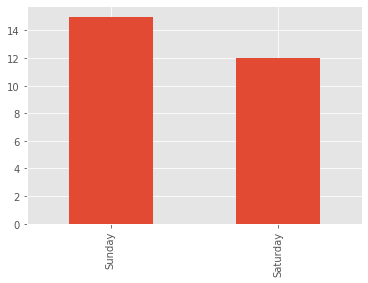

In [89]:
df.loc[(df['match_day'] == 'Sunday' ) | (df['match_day'] == 'Saturday' )]['match_day'].value_counts().plot(kind='bar')

### What are the different venues on which RCB Played?

In [103]:
df.loc[(df['team_1'] == 'RCB') | (df['team_2'] == 'RCB')]['venue'].value_counts()

Bengaluru    7
Hyderabad    1
Mohali       1
Chennai      1
Kolkata      1
Jaipur       1
Mumbai       1
Delhi        1
Name: venue, dtype: int64

### What is the Highest Score? by which team?

In [162]:
df.iloc[df[['team_1_score', 'team_2_score']].idxmax()].iloc[0][['team_1', 'team_1_score']]

team_1          KKR
team_1_score    232
Name: 13, dtype: object

### What is the Lowest Score? by which team?

In [165]:
df.iloc[df[['team_1_score', 'team_2_score']].idxmin()].iloc[0][['team_1', 'team_1_score']]

team_1          RCB
team_1_score     62
Name: 11, dtype: object

### How many matches KKR won if they played on their home ground?

In [172]:
df.loc[(df['team_1'] == 'KKR') | (df['team_2'] == 'KKR')].loc[df['venue'] == 'Kolkata']['winner'].value_counts()

KKR    3
RCB    1
RR     1
DC     1
CSK    1
Name: winner, dtype: int64

### How many matches DC won while playing away from their home?

In [176]:
df.loc[(df['team_1'] == 'DC') | (df['team_2'] == 'DC')].loc[df['venue'] != 'Delhi']['winner'].value_counts()

DC      6
CSK     2
KXIP    1
Name: winner, dtype: int64

### On which venue most of the matches played? plot

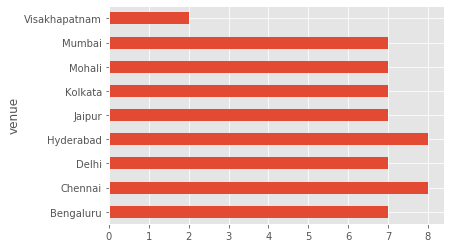

In [180]:
df.groupby('venue').size().plot(kind='barh')

### How many matches KXIP won while playing on weekends?

In [186]:
df.loc[(df['team_1'] == 'KXIP') | (df['team_2'] == 'KXIP')].loc[
    (df['match_day'] == 'Saturday') | (df['match_day'] == 'Sunday')].loc[df['winner'] == 'KXIP']

,team_1,team_2,team_1_score,team_2_score,venue,winner,match_date,match_day
5,KXIP,CSK,173,170,Mohali,KXIP,5th May,Sunday
51,KXIP,MI,177,176,Mohali,KXIP,30th March,Saturday


### What is the lowest total of CSK?

In [198]:
df.loc[(df['team_1'] == 'CSK') | (df['team_2'] == 'CSK')][['team_1_score', 'team_2_score']].min()['team_1_score']

71